# HR Analytics: Data Exploration

Notebook này thực hiện Exploratory Data Analysis (EDA) cho dataset HR Analytics.

## Mục tiêu:
1. Load và khám phá cấu trúc dữ liệu
2. Phân tích phân phối các features
3. Kiểm tra missing values và outliers
4. Phân tích mối quan hệ giữa features và target
5. Trả lời các câu hỏi nghiên cứu

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append('../src')

from data_processing import DataProcessor
from visualization import DataVisualizer

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully")


Libraries imported successfully


In [2]:
# Load data
processor = DataProcessor()
visualizer = DataVisualizer()

data, headers = processor.load_csv('../data/raw/aug_train.csv')
print(f"Dataset shape: {data.shape}")
print(f"Features: {headers}")

Dataset shape: (19158, 14)
Features: ['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target']


In [3]:
# Basic statistics
print("\n=== BASIC STATISTICS ===\n")
print(f"Number of samples: {data.shape[0]}")
print(f"Number of features: {data.shape[1]}")
print(f"\nFeature names:")
for i, header in enumerate(headers):
    print(f"  {i+1}. {header}")


=== BASIC STATISTICS ===

Number of samples: 19158
Number of features: 14

Feature names:
  1. enrollee_id
  2. city
  3. city_development_index
  4. gender
  5. relevent_experience
  6. enrolled_university
  7. education_level
  8. major_discipline
  9. experience
  10. company_size
  11. company_type
  12. last_new_job
  13. training_hours
  14. target



=== TARGET DISTRIBUTION ===

Không thay đổi: 14381 (75.07%)
Thay đổi công việc: 4777 (24.93%)


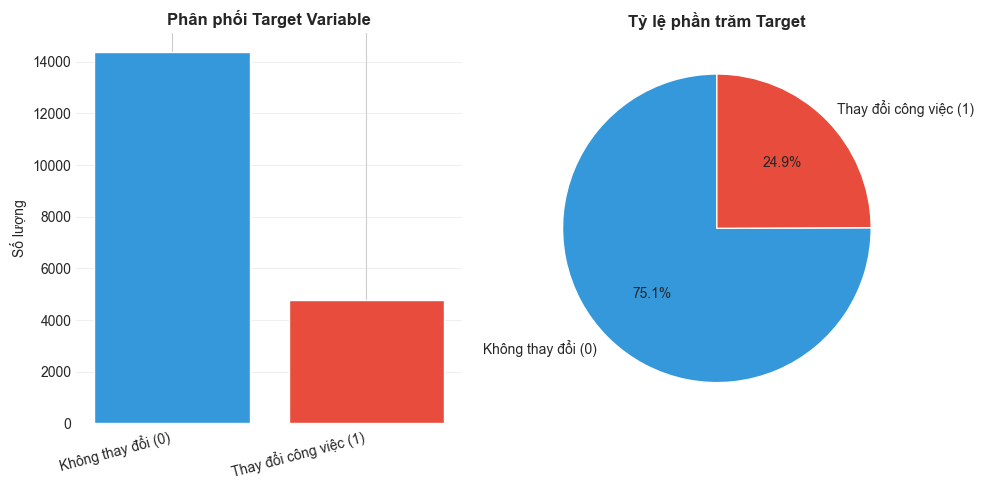

In [4]:
# Target distribution
# Tìm vị trí cột target
target_idx = headers.index('target')
target = data[:, target_idx].astype(float)

print("\n=== TARGET DISTRIBUTION ===\n")
unique, counts = np.unique(target, return_counts=True)
for val, count in zip(unique, counts):
    label = "Không thay đổi" if val == 0 else "Thay đổi công việc"
    print(f"{label}: {count} ({count/len(target)*100:.2f}%)")

# Visualize
fig = visualizer.plot_target_distribution(target)
plt.show()


=== MISSING VALUES ANALYSIS ===



gender: 4508 (23.53%)
enrolled_university: 386 (2.01%)
education_level: 460 (2.40%)
major_discipline: 2813 (14.68%)
experience: 65 (0.34%)
company_size: 5938 (30.99%)
company_type: 6140 (32.05%)
last_new_job: 423 (2.21%)


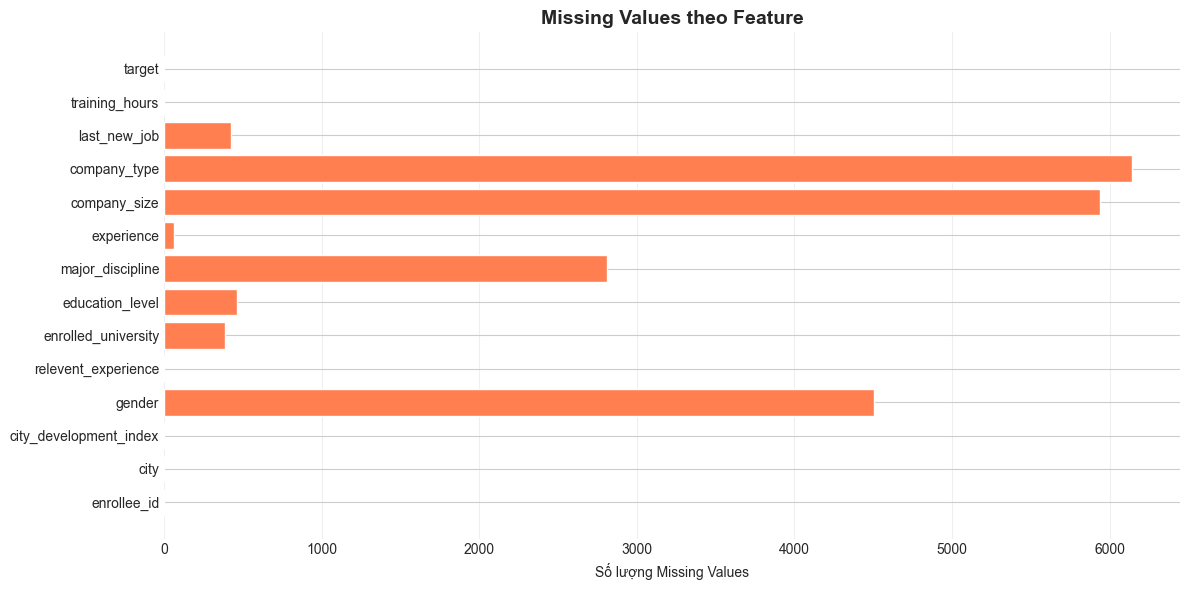

In [5]:
# Missing values analysis
print("\n=== MISSING VALUES ANALYSIS ===\n")
missing_mask, missing_count = processor.check_missing_values(data)

for i, (header, count) in enumerate(zip(headers, missing_count)):
    if count > 0:
        percentage = count / data.shape[0] * 100
        print(f"{header}: {count} ({percentage:.2f}%)")

# Visualize
fig = visualizer.plot_missing_values(missing_count, headers)
plt.show()


=== CITY_DEVELOPMENT_INDEX ===
mean: 0.8288
median: 0.9030
std: 0.1234
min: 0.4480
max: 0.9490
q25: 0.7400
q75: 0.9200


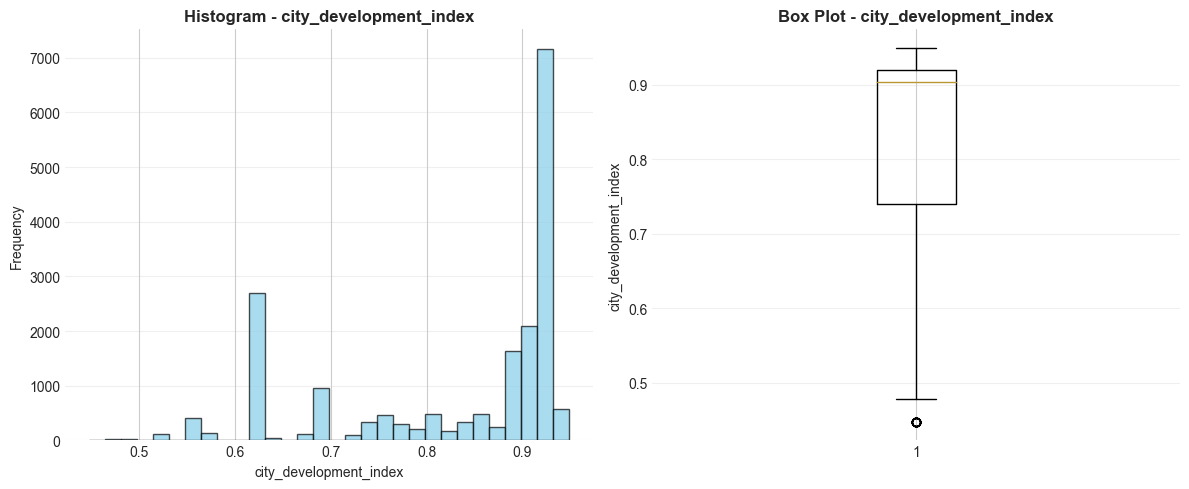

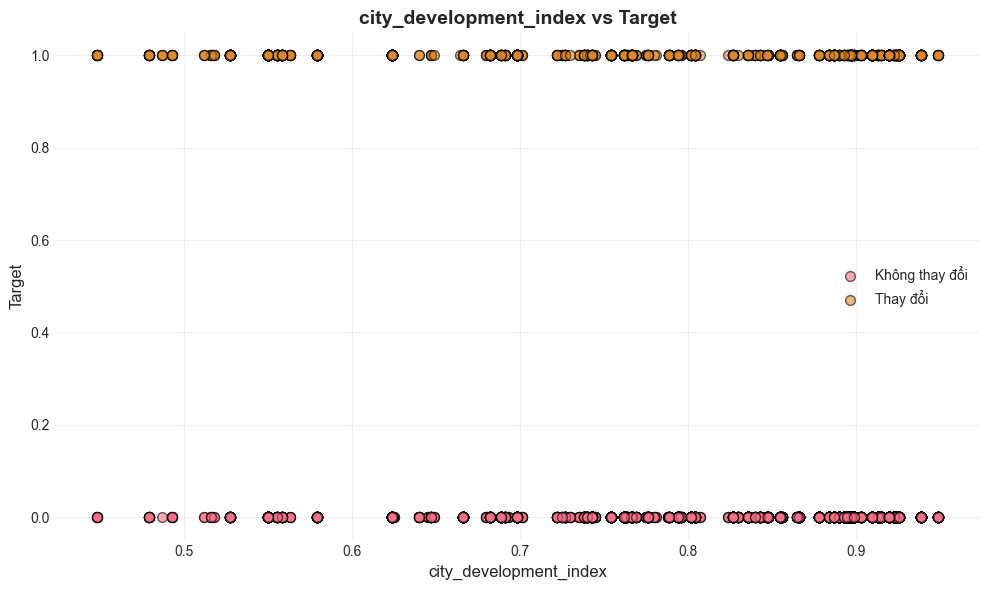


=== TRAINING_HOURS ===
mean: 65.3669
median: 47.0000
std: 60.0569
min: 1.0000
max: 336.0000
q25: 23.0000
q75: 88.0000


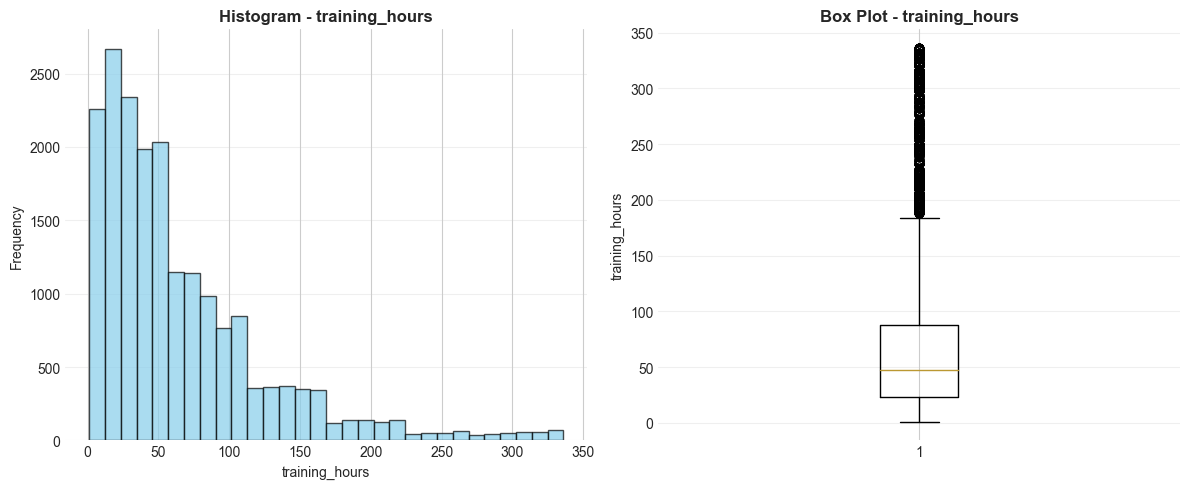

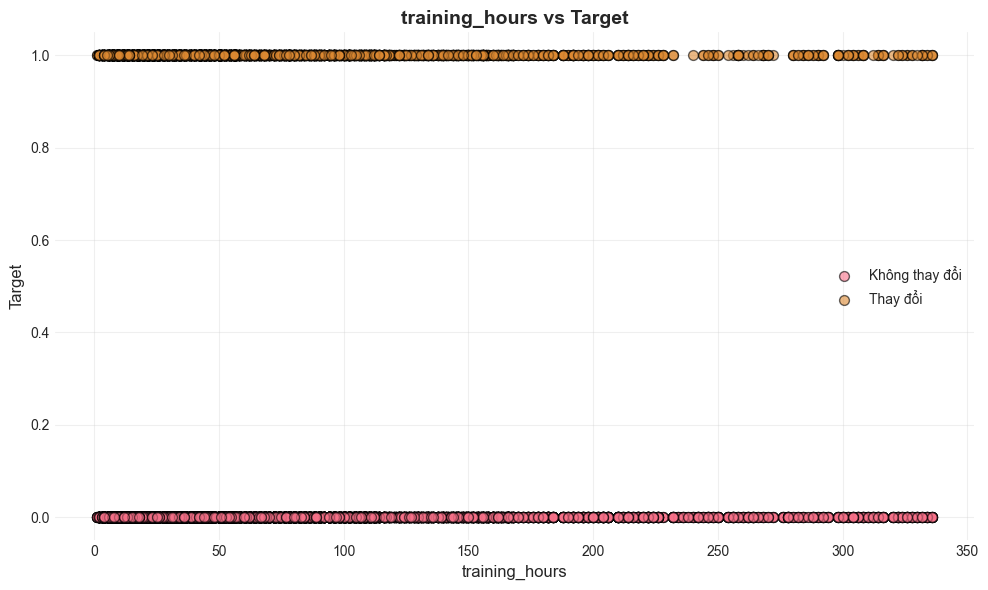

In [6]:
# Numerical features analysis
numerical_features = ['city_development_index', 'training_hours']

for feat in numerical_features:
    # Tìm vị trí cột target
    col_idx = headers.index(feat)
    col = data[:, col_idx].astype(float)
    #col = processor.get_column_by_name(data, headers, feat)
    # fill_missing_numerical returns (filled_array, statistic) -> unpack and keep the array
    col_numeric, _ = processor.fill_missing_numerical(col, strategy='median')
    
    print(f"\n=== {feat.upper()} ===")
    stats = processor.get_statistics(col_numeric)
    for key, value in stats.items():
        print(f"{key}: {value:.4f}")
    
    # Visualize
    fig = visualizer.plot_numerical_distribution(col_numeric, feat)
    plt.show()
    
    # Scatter with target
    fig = visualizer.plot_scatter(
        col_numeric, target, 
        feat, 'Target',
        hue=target
    )
    plt.show()


=== GENDER ===
Unique values: 3
Top 5 values:
  Male: 17729
  Female: 1238
  Other: 191


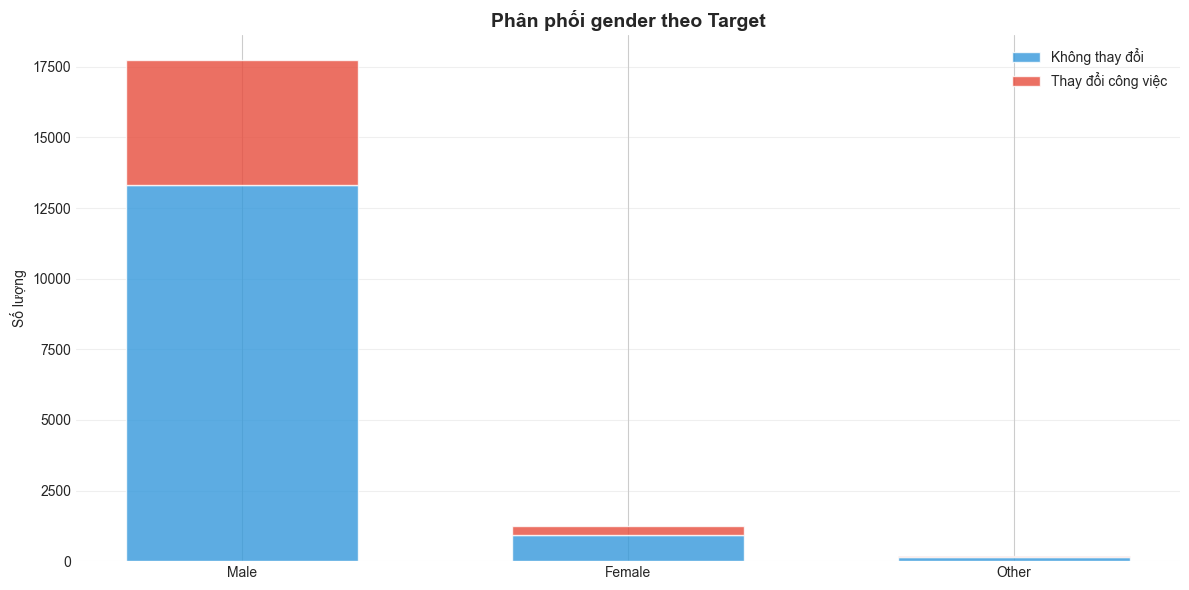


=== RELEVENT_EXPERIENCE ===
Unique values: 2
Top 5 values:
  Has relevent experience: 13792
  No relevent experience: 5366


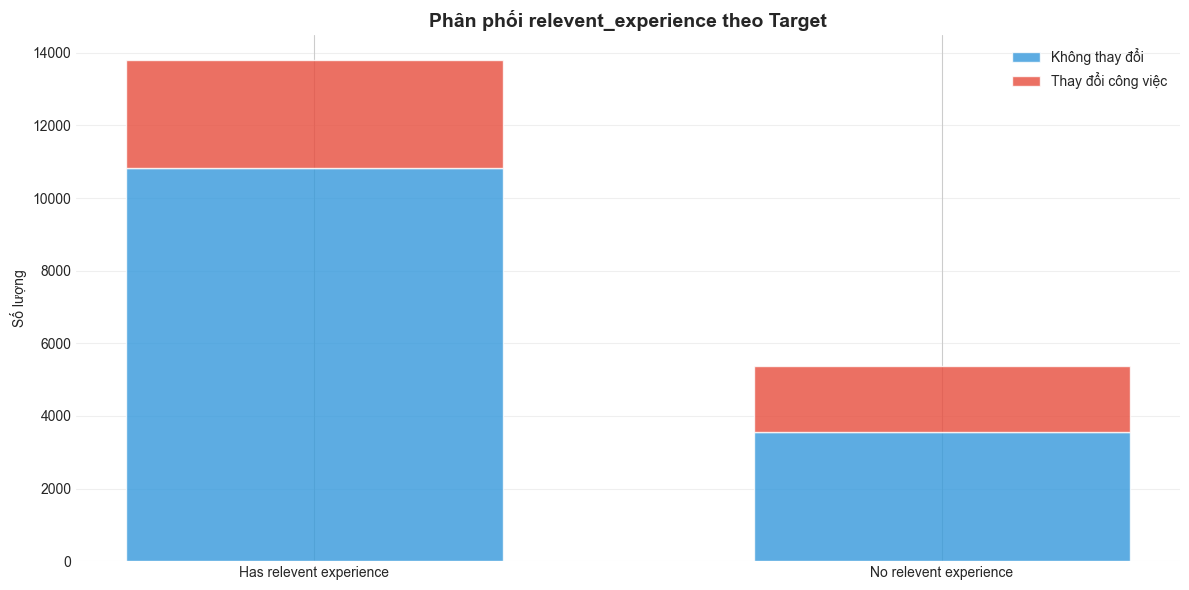


=== ENROLLED_UNIVERSITY ===
Unique values: 3
Top 5 values:
  no_enrollment: 14203
  Full time course: 3757
  Part time course: 1198


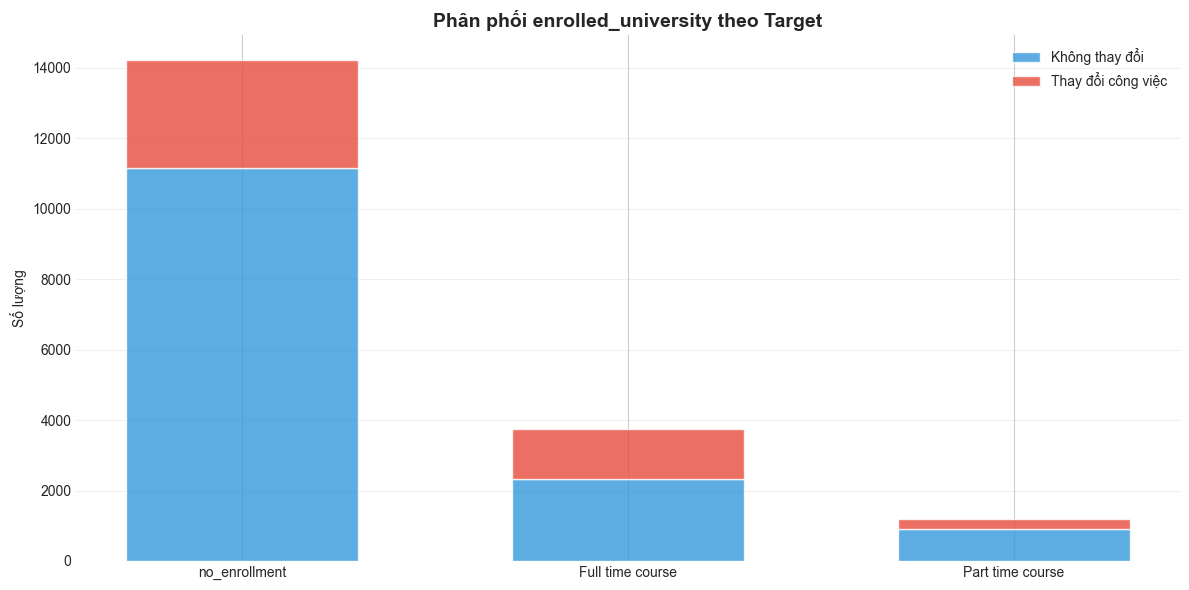


=== EDUCATION_LEVEL ===
Unique values: 5
Top 5 values:
  Graduate: 12058
  Masters: 4361
  High School: 2017
  Phd: 414
  Primary School: 308


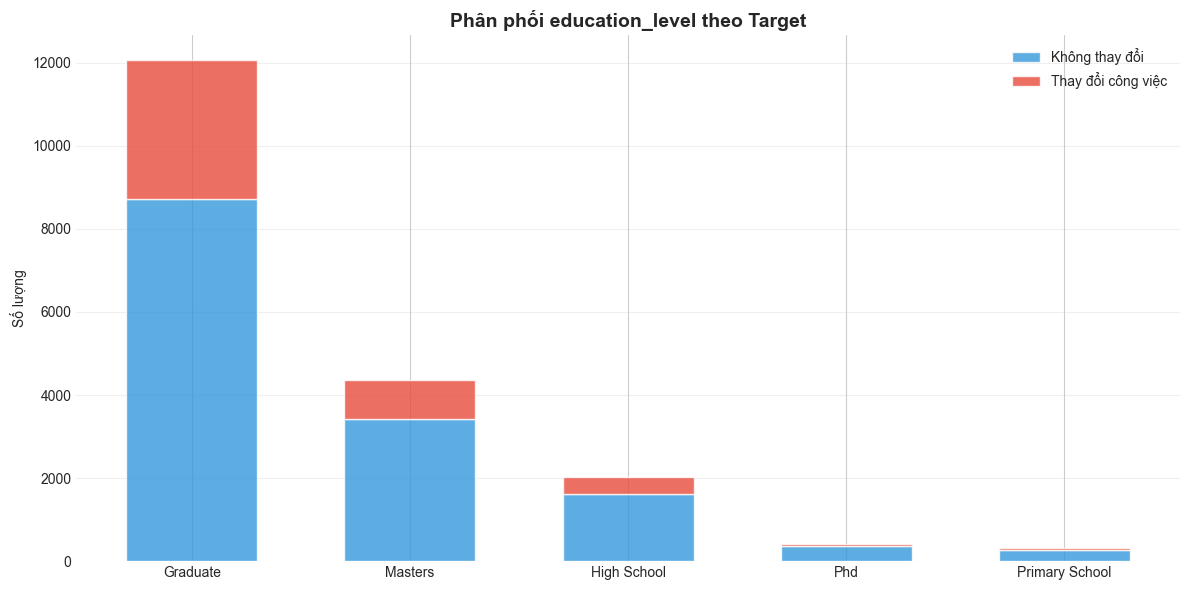


=== MAJOR_DISCIPLINE ===
Unique values: 6
Top 5 values:
  STEM: 17305
  Humanities: 669
  Other: 381
  Business Degree: 327
  Arts: 253


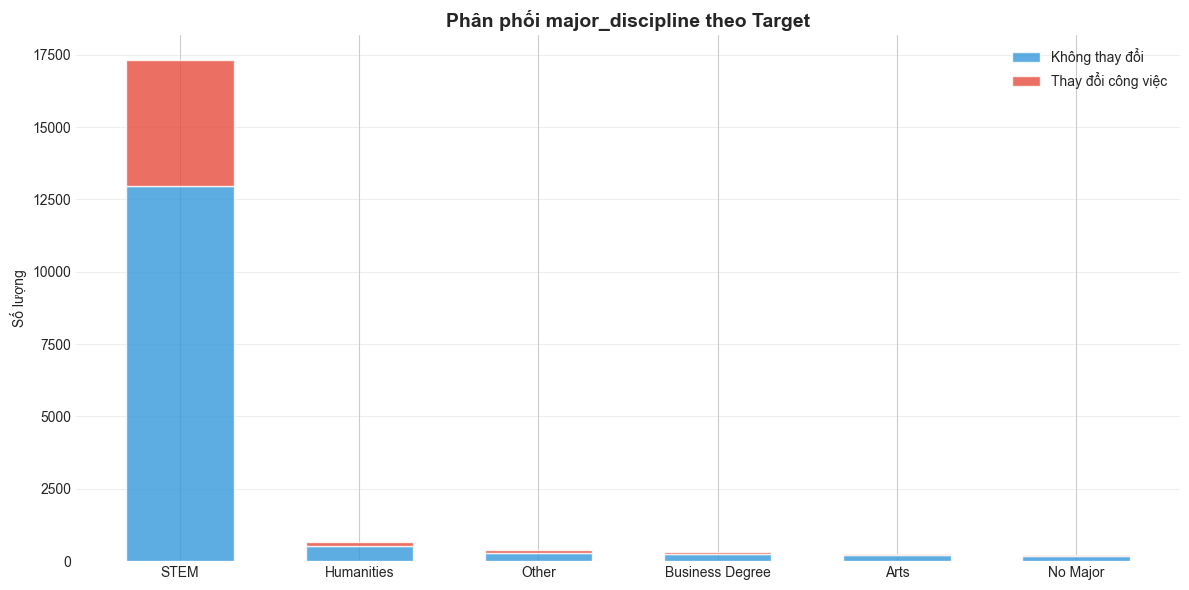


=== EXPERIENCE ===
Unique values: 22
Top 5 values:
  >20: 3351
  5: 1430
  4: 1403
  3: 1354
  6: 1216


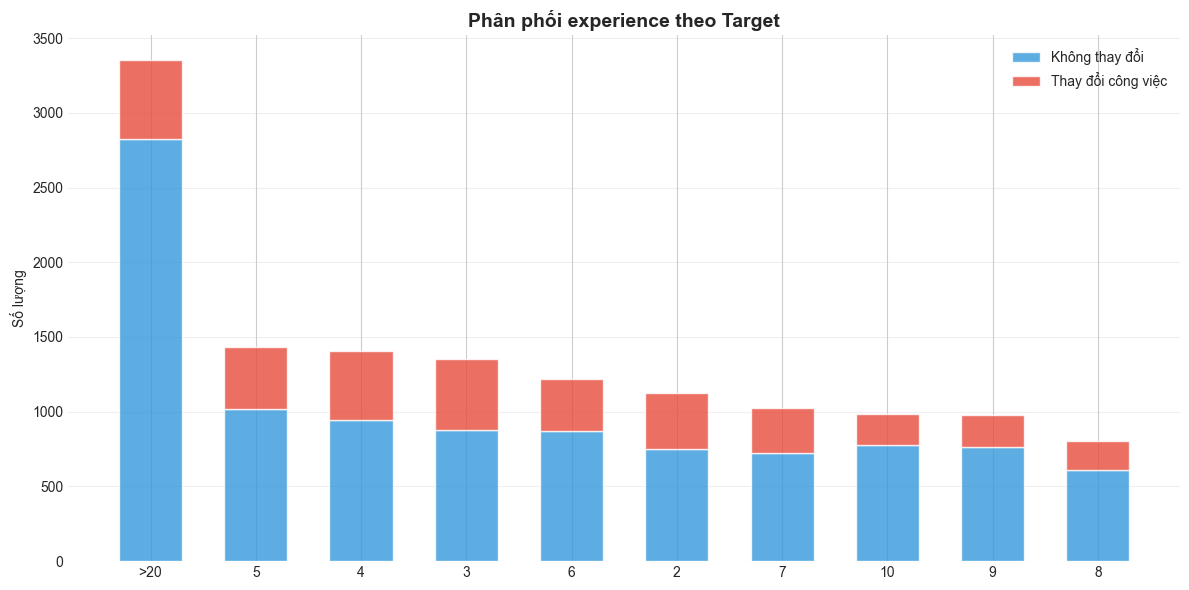


=== COMPANY_SIZE ===
Unique values: 8
Top 5 values:
  50-99: 9021
  100-500: 2571
  10000+: 2019
  10/49: 1471
  1000-4999: 1328


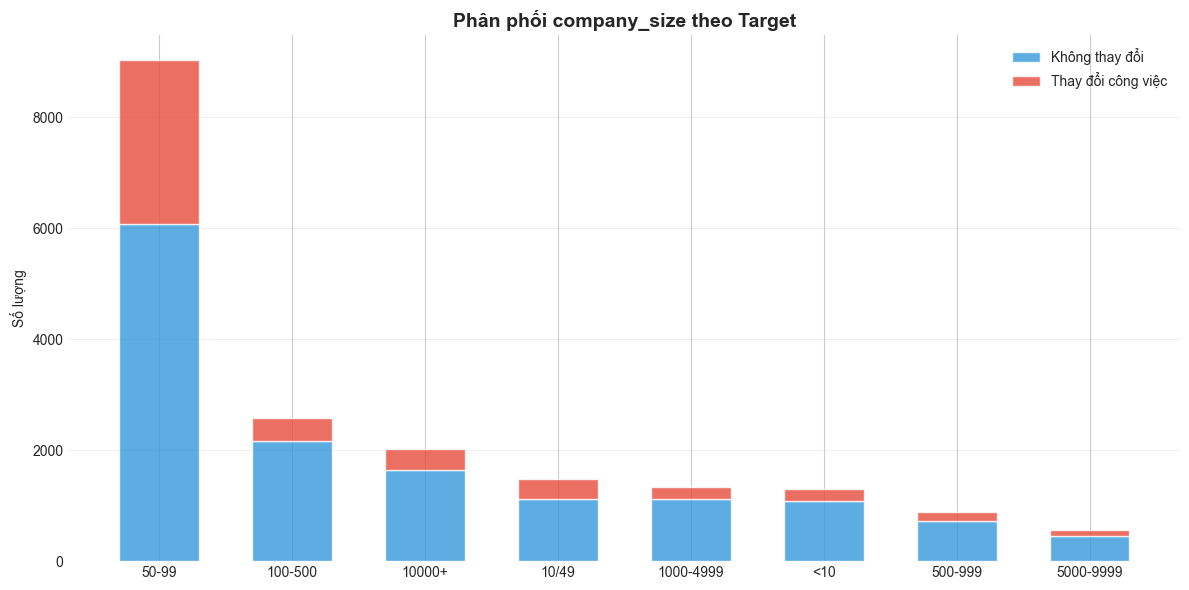


=== COMPANY_TYPE ===
Unique values: 6
Top 5 values:
  Pvt Ltd: 15957
  Funded Startup: 1001
  Public Sector: 955
  Early Stage Startup: 603
  NGO: 521


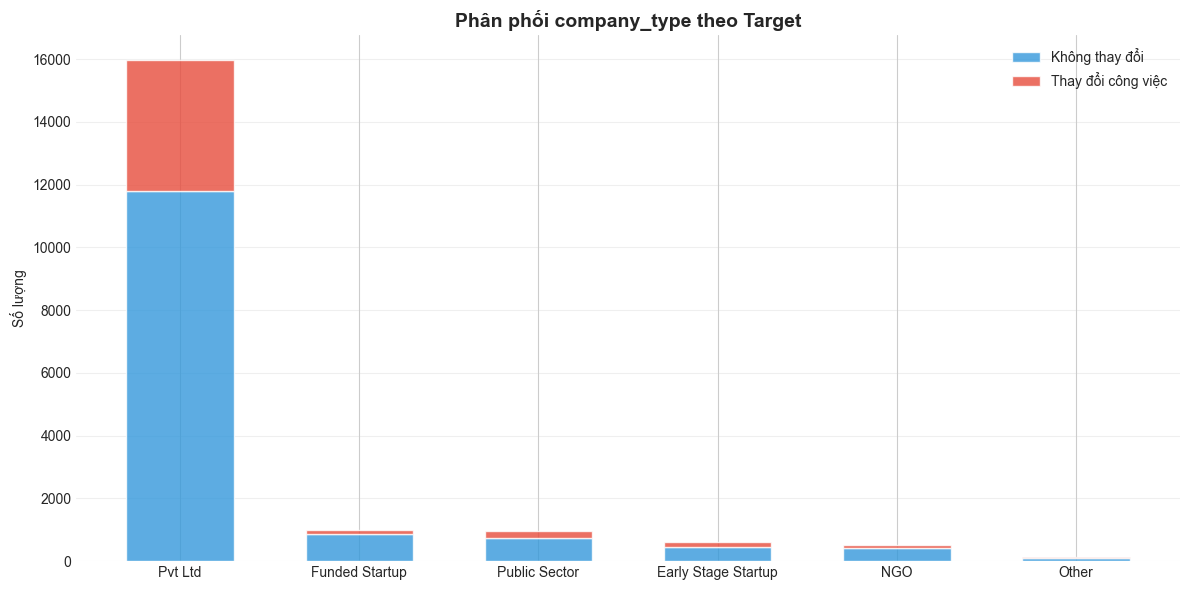


=== LAST_NEW_JOB ===
Unique values: 6
Top 5 values:
  1: 8463
  >4: 3290
  2: 2900
  never: 2452
  4: 1029


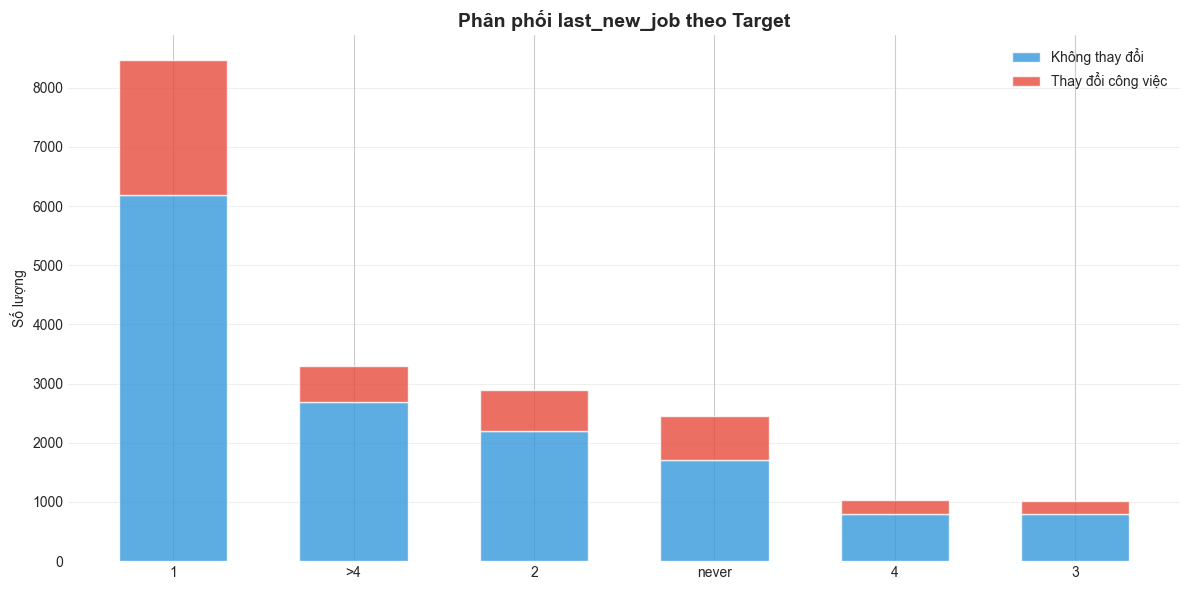

In [7]:
# Categorical features analysis
# Note: fix typo 'relevant_experience' -> 'relevent_experience' to match headers,
# and do not cast categorical columns to float (they contain string values like 'Male').
categorical_features = ['gender', 'relevent_experience', 'enrolled_university',
                        'education_level', 'major_discipline', 'experience',
                        'company_size', 'company_type', 'last_new_job']

for feat in categorical_features:
    if feat in headers:
        col_idx = headers.index(feat)
        col = data[:, col_idx]
        # fill_missing_categorical returns (filled_array, statistic) -> unpack to get the array
        col_filled, _ = processor.fill_missing_categorical(col, strategy='mode')
        
        print(f"\n=== {feat.upper()} ===")
        unique, counts = np.unique(col_filled, return_counts=True)
        print(f"Unique values: {len(unique)}")
        print(f"Top 5 values:")
        sorted_idx = np.argsort(counts)[::-1][:5]
        for idx in sorted_idx:
            print(f"  {unique[idx]}: {counts[idx]}")
        
        # Visualize
        fig = visualizer.plot_categorical_distribution(
            col_filled, feat, target=target, top_n=10
        )
        plt.show()


=== CORRELATION ANALYSIS ===



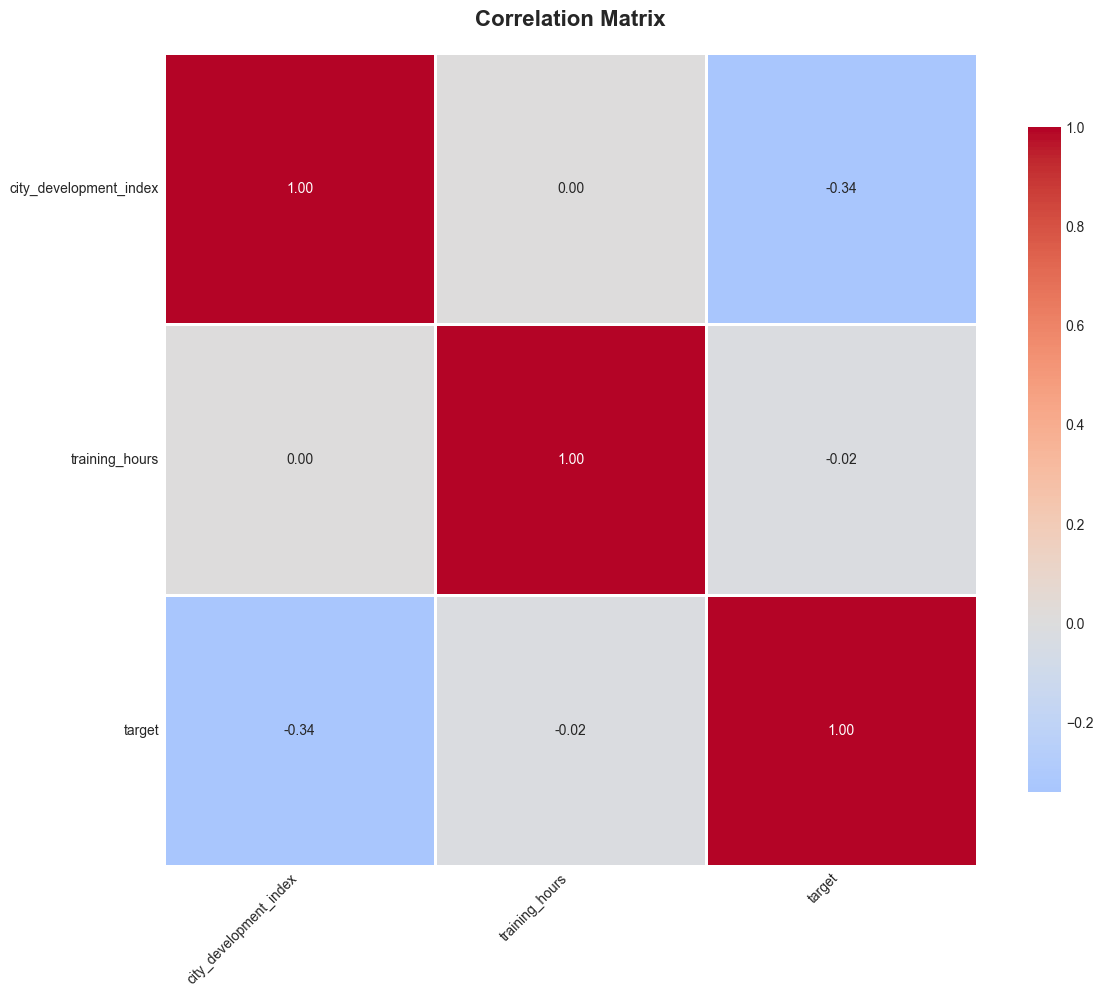

Strong correlations with target:
  city_development_index: -0.3417


In [8]:
# Correlation analysis
print("\n=== CORRELATION ANALYSIS ===\n")

# Prepare numerical data
X_numerical = []
feature_names_num = []

for feat in numerical_features:
    col_idx = headers.index(feat)
    # ensure numeric type before filling
    col = data[:, col_idx].astype(float)
    # fill_missing_numerical returns (filled_array, statistic) -> unpack to keep the array
    col_numeric, _ = processor.fill_missing_numerical(col, strategy='median')
    X_numerical.append(col_numeric)
    feature_names_num.append(feat)

# Add target
X_numerical.append(target)
feature_names_num.append('target')

X_matrix = np.column_stack(X_numerical)
corr_matrix = processor.compute_correlation_matrix(X_matrix)

# Visualize
fig = visualizer.plot_correlation_heatmap(corr_matrix, feature_names_num)
plt.show()

# Print strong correlations
print("Strong correlations with target:")
target_idx = feature_names_num.index('target')
for i, feat in enumerate(feature_names_num):
    if i != target_idx:
        corr = corr_matrix[i, target_idx]
        if abs(corr) > 0.1:
            print(f"  {feat}: {corr:.4f}")

## Câu hỏi nghiên cứu

### Câu hỏi 1 - Mối quan hệ giữa Kinh nghiệm và Quy mô công ty

#### Các công ty lớn (Enterprise) có xu hướng tuyển dụng nhân sự giàu kinh nghiệm hơn so với các Startup nhỏ không?


=== Q1: EXPERIENCE vs COMPANY SIZE ===



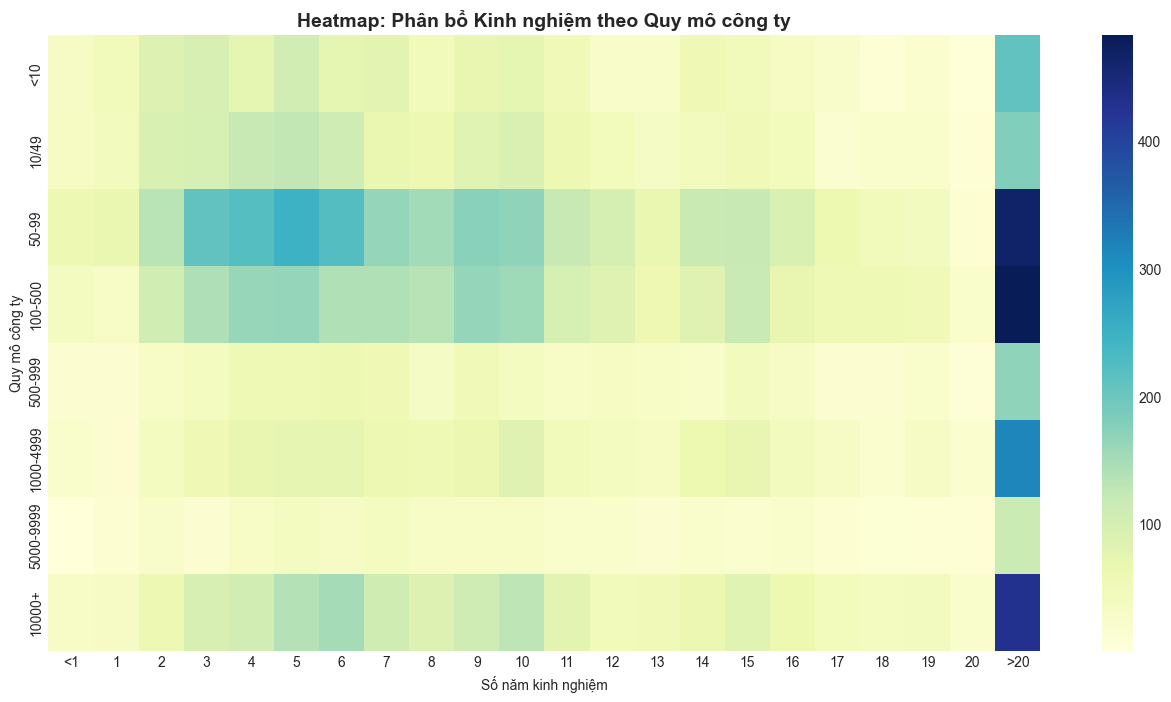


➤ NHẬN XÉT THÚ VỊ:
- Các công ty rất lớn (10000+) tập trung một lượng lớn nhân sự có thâm niên cực cao (>20 năm).
- Ngược lại, các công ty nhỏ (<10, 10/49) có sự phân bổ đều hơn ở các mức kinh nghiệm thấp và trung bình (startup thường thu hút nhân sự trẻ).
- Có một "vùng trũng" ở giữa: Nhân sự tầm trung (5-10 năm) dường như phân tán khá đều.



In [9]:
#Research Question 1 - Experience vs Company Size
print("\n=== Q1: EXPERIENCE vs COMPANY SIZE ===\n")

# 1. Lấy dữ liệu
exp_col_idx = headers.index('experience')
size_col_idx = headers.index('company_size')

# Lọc bỏ các dòng có missing values ở 2 cột này để visualize cho sạch
valid_mask = (data[:, exp_col_idx] != '') & (data[:, exp_col_idx] != 'nan') & \
             (data[:, size_col_idx] != '') & (data[:, size_col_idx] != 'nan')
data_q1 = data[valid_mask]

exp_data = data_q1[:, exp_col_idx]
size_data = data_q1[:, size_col_idx]

# 2. Định nghĩa thứ tự để vẽ biểu đồ cho logic (Sorting)
size_order = ['<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
exp_order = ['<1'] + [str(i) for i in range(1, 21)] + ['>20']

# 3. Tạo ma trận tần suất (Heatmap data)
heatmap_data = np.zeros((len(size_order), len(exp_order)))

for i, size in enumerate(size_order):
    for j, exp in enumerate(exp_order):
        count = np.sum((size_data == size) & (exp_data == exp))
        heatmap_data[i, j] = count

# 4. Vẽ biểu đồ Heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, xticklabels=exp_order, yticklabels=size_order, 
            cmap="YlGnBu", annot=False)
plt.title('Heatmap: Phân bổ Kinh nghiệm theo Quy mô công ty', fontsize=14, fontweight='bold')
plt.xlabel('Số năm kinh nghiệm')
plt.ylabel('Quy mô công ty')
plt.show()

print("""
➤ NHẬN XÉT THÚ VỊ:
- Các công ty rất lớn (10000+) tập trung một lượng lớn nhân sự có thâm niên cực cao (>20 năm).
- Ngược lại, các công ty nhỏ (<10, 10/49) có sự phân bổ đều hơn ở các mức kinh nghiệm thấp và trung bình (startup thường thu hút nhân sự trẻ).
- Có một "vùng trũng" ở giữa: Nhân sự tầm trung (5-10 năm) dường như phân tán khá đều.
""")

### Câu hỏi 2 - Phân phối giờ đào tạo

#### Những người muốn nhảy việc (Target=1) có xu hướng dành nhiều hay ít thời gian đào tạo (Training Hours) hơn những người ổn định?


=== Q2: TRAINING HOURS DISTRIBUTION ===



e:\miniconda\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\miniconda\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
e:\miniconda\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\miniconda\envs\min_ds-env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

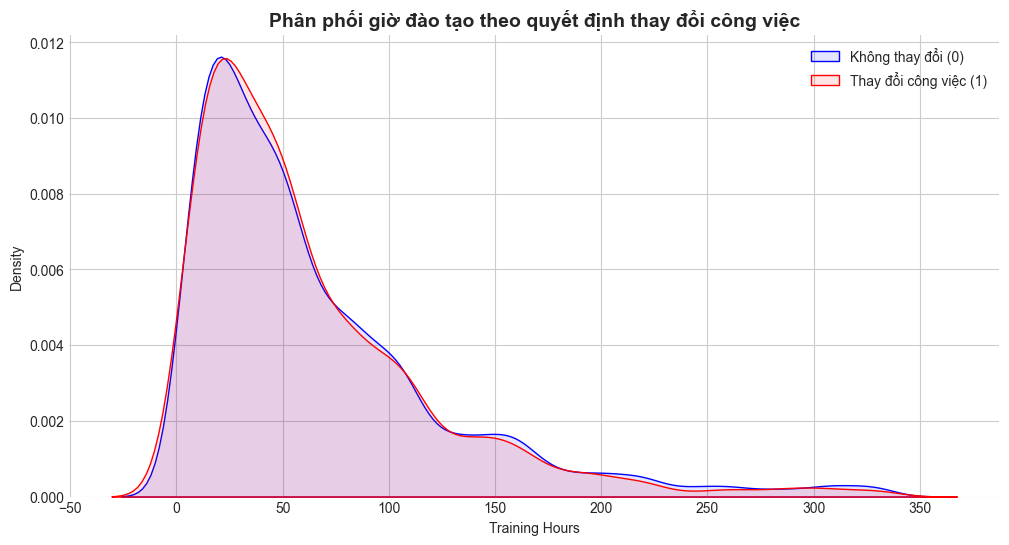


➤ NHẬN XÉT THÚ VỊ:
- Biểu đồ phân phối (Distribution) của hai nhóm gần như trùng khít nhau!
- Điều này rất ngạc nhiên: Số giờ đào tạo (Training Hours) dường như KHÔNG phải là yếu tố quyết định mạnh mẽ đến việc một người có muốn nhảy việc hay không.
- Dù bạn học nhiều hay ít, xác suất bạn muốn nghỉ việc là tương đương. Feature này có thể có độ quan trọng thấp (low feature importance) trong mô hình.



In [10]:
# Research Question 2 - Training Hours Distribution
print("\n=== Q2: TRAINING HOURS DISTRIBUTION ===\n")

train_hours_idx = headers.index('training_hours')
target_idx = headers.index('target')

# Chuyển đổi training_hours sang float để vẽ biểu đồ
# Xử lý missing values bằng cách bỏ qua hoặc điền median tạm thời
th_data = data[:, train_hours_idx]
# Fill missing tạm thời bằng median để không lỗi code vẽ
th_numeric = []
for val in th_data:
    try:
        th_numeric.append(float(val))
    except:
        th_numeric.append(np.nan)
th_numeric = np.array(th_numeric)
# Fill nan = median
th_numeric[np.isnan(th_numeric)] = np.nanmedian(th_numeric)

target_data = data[:, target_idx].astype(float)

# Vẽ biểu đồ KDE (Kernel Density Estimate)
plt.figure(figsize=(12, 6))
sns.kdeplot(th_numeric[target_data == 0], color='blue', label='Không thay đổi (0)', fill=True, alpha=0.1)
sns.kdeplot(th_numeric[target_data == 1], color='red', label='Thay đổi công việc (1)', fill=True, alpha=0.1)

plt.title('Phân phối giờ đào tạo theo quyết định thay đổi công việc', fontsize=14, fontweight='bold')
plt.xlabel('Training Hours')
plt.ylabel('Density')
plt.legend()
plt.show()

print("""
➤ NHẬN XÉT THÚ VỊ:
- Biểu đồ phân phối (Distribution) của hai nhóm gần như trùng khít nhau!
- Điều này rất ngạc nhiên: Số giờ đào tạo (Training Hours) dường như KHÔNG phải là yếu tố quyết định mạnh mẽ đến việc một người có muốn nhảy việc hay không.
- Dù bạn học nhiều hay ít, xác suất bạn muốn nghỉ việc là tương đương. Feature này có thể có độ quan trọng thấp (low feature importance) trong mô hình.
""")

### Câu hỏi 3 - Trình độ học vấn & Khoảng cách thay đổi công việc

#### Trình độ học vấn (Education Level) có ảnh hưởng đến tần suất thay đổi công việc (Last New Job) không? Người có bằng cấp cao có xu hướng "nhảy việc" thường xuyên hơn hay ổn định hơn?


=== Q3: EDUCATION LEVEL vs LAST NEW JOB ===



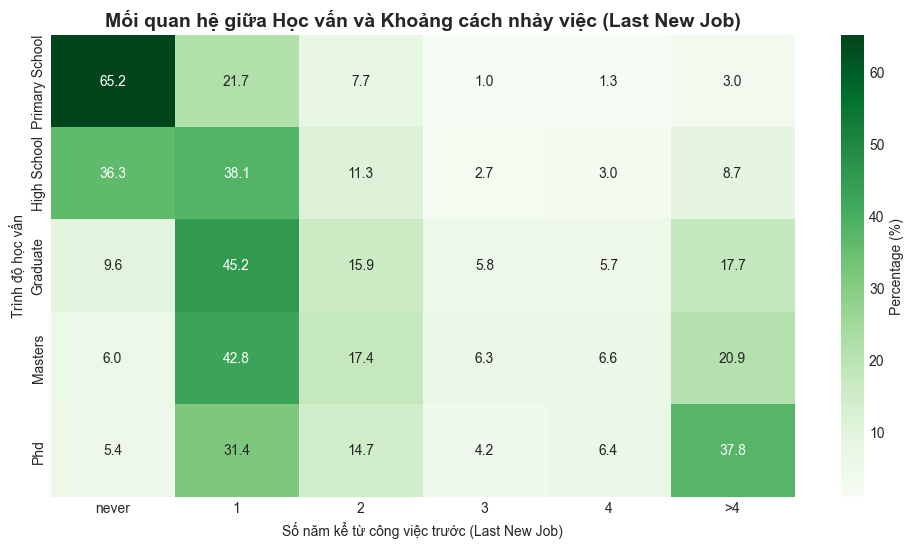


➤ NHẬN XÉT THÚ VỊ:
- Nhóm "Graduate" (Cử nhân) và "Masters" (Thạc sĩ) có xu hướng tương đồng nhau, phần lớn tập trung ở mức "1" năm (nhảy việc khá thường xuyên).
- Nhóm "Phd" (Tiến sĩ) có tỷ lệ ">4" (ổn định lâu dài) cao đáng kể so với các nhóm khác. Điều này cho thấy nhân sự cấp cao/chuyên sâu thường gắn bó với công việc lâu hơn.
- Nhóm "Primary School" và "High School" có tỷ lệ "never" (chưa từng đi làm trước đó) cao nhất, điều này hợp lý vì họ mới gia nhập thị trường lao động.



In [11]:
# Research Question 3 - Education Level vs Last New Job
print("\n=== Q3: EDUCATION LEVEL vs LAST NEW JOB ===\n")

edu_idx = headers.index('education_level')
job_idx = headers.index('last_new_job')

# Lọc data hợp lệ
mask_valid = (data[:, edu_idx] != '') & (data[:, edu_idx] != 'nan') & \
             (data[:, job_idx] != '') & (data[:, job_idx] != 'nan')
data_q3 = data[mask_valid]

# Định nghĩa thứ tự
edu_order = ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd']
job_order = ['never', '1', '2', '3', '4', '>4']

# Tính toán tỷ lệ phần trăm (Normalize theo hàng - Education Level)
matrix_data = np.zeros((len(edu_order), len(job_order)))

for i, edu in enumerate(edu_order):
    edu_rows = data_q3[data_q3[:, edu_idx] == edu]
    total_in_edu = len(edu_rows)
    if total_in_edu > 0:
        for j, job in enumerate(job_order):
            count = np.sum(edu_rows[:, job_idx] == job)
            matrix_data[i, j] = count / total_in_edu * 100 # Tính phần trăm

# Vẽ Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(matrix_data, xticklabels=job_order, yticklabels=edu_order, 
            cmap="Greens", annot=True, fmt='.1f', cbar_kws={'label': 'Percentage (%)'})
plt.title('Mối quan hệ giữa Học vấn và Khoảng cách nhảy việc (Last New Job)', fontsize=14, fontweight='bold')
plt.xlabel('Số năm kể từ công việc trước (Last New Job)')
plt.ylabel('Trình độ học vấn')
plt.show()

print("""
➤ NHẬN XÉT THÚ VỊ:
- Nhóm "Graduate" (Cử nhân) và "Masters" (Thạc sĩ) có xu hướng tương đồng nhau, phần lớn tập trung ở mức "1" năm (nhảy việc khá thường xuyên).
- Nhóm "Phd" (Tiến sĩ) có tỷ lệ ">4" (ổn định lâu dài) cao đáng kể so với các nhóm khác. Điều này cho thấy nhân sự cấp cao/chuyên sâu thường gắn bó với công việc lâu hơn.
- Nhóm "Primary School" và "High School" có tỷ lệ "never" (chưa từng đi làm trước đó) cao nhất, điều này hợp lý vì họ mới gia nhập thị trường lao động.
""")

### Câu hỏi 4 - Kinh nghiệm & Tỷ lệ nghỉ việc

#### Nhân viên ở giai đoạn nào của sự nghiệp (Số năm kinh nghiệm) có nguy cơ nghỉ việc cao nhất?


=== Q4: EXPERIENCE vs CHURN RATE ===



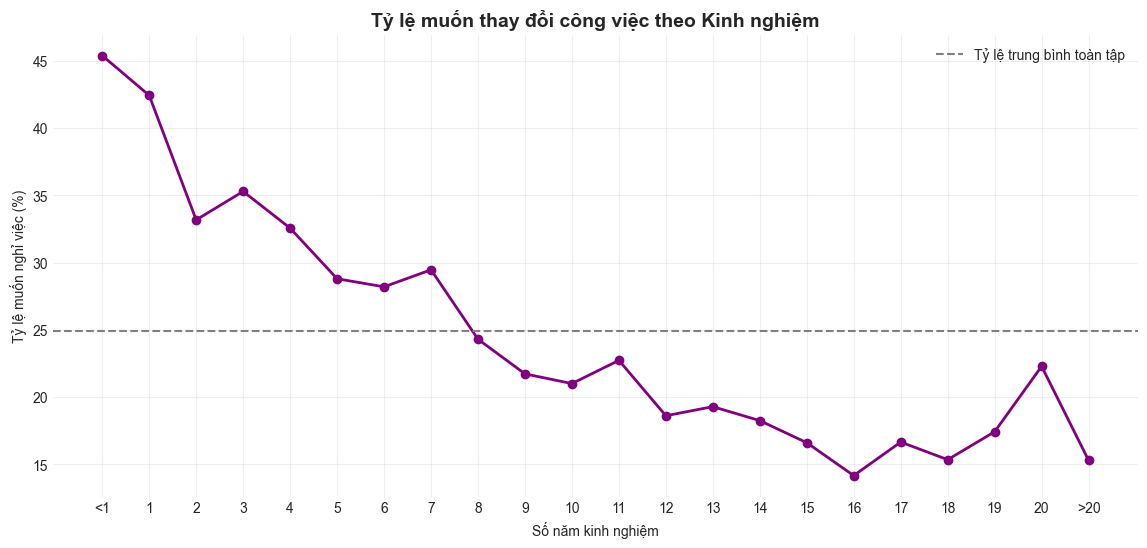


➤ NHẬN XÉT THÚ VỊ:
- Có một xu hướng giảm rõ rệt: Kinh nghiệm càng cao, tỷ lệ muốn nhảy việc càng thấp.
- Nhóm rủi ro cao nhất là nhóm "<1" năm đến "5" năm kinh nghiệm (Junior/Mid-level). Đây là giai đoạn nhân sự tích cực tìm kiếm cơ hội tốt hơn.
- Nhóm ">20" năm kinh nghiệm có tỷ lệ nhảy việc thấp nhất (rất ổn định).
- Điểm gãy (Elbow point): Sau khoảng 10 năm kinh nghiệm, tỷ lệ nghỉ việc bắt đầu đi ngang và thấp hơn mức trung bình.



In [12]:
# Research Question 4 - Experience vs Target (Churn Rate)
print("\n=== Q4: EXPERIENCE vs CHURN RATE ===\n")

exp_col_idx = headers.index('experience')
target_idx = headers.index('target')

# Lấy dữ liệu và xử lý missing
mask_valid = (data[:, exp_col_idx] != '') & (data[:, exp_col_idx] != 'nan')
data_q4 = data[mask_valid]

exp_vals = data_q4[:, exp_col_idx]
target_vals = data_q4[:, target_idx].astype(float)

# Định nghĩa thứ tự
exp_order = ['<1'] + [str(i) for i in range(1, 21)] + ['>20']
churn_rates = []

for exp in exp_order:
    # Lấy target của nhóm kinh nghiệm này
    subset_target = target_vals[exp_vals == exp]
    if len(subset_target) > 0:
        # Tính trung bình target (chính là tỷ lệ nghỉ việc vì target là 0/1)
        rate = np.mean(subset_target) * 100
    else:
        rate = 0
    churn_rates.append(rate)

# Vẽ biểu đồ đường
plt.figure(figsize=(14, 6))
plt.plot(exp_order, churn_rates, marker='o', linestyle='-', color='purple', linewidth=2)
plt.axhline(y=np.mean(target_vals)*100, color='gray', linestyle='--', label='Tỷ lệ trung bình toàn tập')

plt.title('Tỷ lệ muốn thay đổi công việc theo Kinh nghiệm', fontsize=14, fontweight='bold')
plt.xlabel('Số năm kinh nghiệm')
plt.ylabel('Tỷ lệ muốn nghỉ việc (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("""
➤ NHẬN XÉT THÚ VỊ:
- Có một xu hướng giảm rõ rệt: Kinh nghiệm càng cao, tỷ lệ muốn nhảy việc càng thấp.
- Nhóm rủi ro cao nhất là nhóm "<1" năm đến "5" năm kinh nghiệm (Junior/Mid-level). Đây là giai đoạn nhân sự tích cực tìm kiếm cơ hội tốt hơn.
- Nhóm ">20" năm kinh nghiệm có tỷ lệ nhảy việc thấp nhất (rất ổn định).
- Điểm gãy (Elbow point): Sau khoảng 10 năm kinh nghiệm, tỷ lệ nghỉ việc bắt đầu đi ngang và thấp hơn mức trung bình.
""")